# Práctica de Aprendizaje Automático

En esta primera práctica vamos a estudiar unos datos de energía eólica utilizando técinas de aprendizaje automático para crear un modelo que pueda predecir cuánta energía se producirá a partir del valor de unas variables meteorológicas.

Esta práctica esta desarrollada por Belén Gómez Arnaldo con NIA 100472037 y Luis Gómez-Manzanilla Nieto con NIA 100472006.

---

## Imports

Para facilitar el resto del código, pondremos todos los imports necesarios a continuación.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import randint as sp_randint
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn import tree
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

C:\Users\ferna\AppData\Local\Temp\ipykernel_17816\2881416910.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Lectura de datos 

Vamos a empezar leyendo el archivo de entrada *wind_ava.csv* e inctroduciendolo en un objeto de pandas

In [2]:
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

A continuación separaremos los conjuntos siendo *X* las entradas de *wind_ava* para la localización de Sotavento (13) y siendo *y* la energía eolíca que producirá el parque de Sotavento. 

In [3]:
#Solo nos interesan las variables que terminan en .13
x = wind_ava.filter(regex='\.13$')
y = wind_ava['energy']

---

## EDA

El primer paso de la práctica es realizar un EDA simplificado para conocer las características del conjunto de datos que estamos estudiando.

Para hacer una primera aproximación de los datos podemos utilizar la función *head()* que devueve las primeras 5 entradas.

In [4]:
x.head()

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
0,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,280.960661,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
1,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,279.296651,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,278.233956,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
3,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,280.787263,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
4,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,279.583112,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


A primera vista los datos de todas las columnas parecen ser numéricos, pero vamos a anlizarlos más en profundidad.

### Dimension 

In [5]:
print('Dimensión de los datos')
print('===============================') 
print(x.shape)


Dimensión de los datos
(4748, 22)


El conjunto de datos tiene 22 características y 4748 instancias.

### Análisis de variables

Empezaremos analizando las variables de entrada para determinar su tipo y comprobar si tenemos que hacer modificaciones o si se pueden eliminar características.

In [6]:
print('Los datos son de los siguientes tipos')
print('===============================')
x.info()

Los datos son de los siguientes tipos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   p54.162.13  4748 non-null   float64
 1   p55.162.13  4748 non-null   float64
 2   cape.13     4748 non-null   float64
 3   p59.162.13  4748 non-null   float64
 4   lai_lv.13   4748 non-null   float64
 5   lai_hv.13   4748 non-null   float64
 6   u10n.13     4748 non-null   float64
 7   v10n.13     4748 non-null   float64
 8   sp.13       4748 non-null   float64
 9   stl1.13     4748 non-null   float64
 10  u10.13      4748 non-null   float64
 11  v10.13      4748 non-null   float64
 12  t2m.13      4748 non-null   float64
 13  stl2.13     4748 non-null   float64
 14  stl3.13     4748 non-null   float64
 15  iews.13     4748 non-null   float64
 16  inss.13     4748 non-null   float64
 17  stl4.13     4748 non-null   float64
 18  fsr.13      4748 non-null   fl

Como se puede ver, todos los datos de las columnas son del tipo float64, es decir, no hay variables categóricas. A continuación comprobaremos si hay valores faltantes y, si es así, qué varibles los tienen. En caso de que hubiese valores nulos habría que decidir qué hacer con esas instancias ya que se podrían eliminar o intentar introducirles algún valor.

In [7]:
print('Valores faltantes')
print('======================================')
print(x.isnull().sum())

Valores faltantes
p54.162.13    0
p55.162.13    0
cape.13       0
p59.162.13    0
lai_lv.13     0
lai_hv.13     0
u10n.13       0
v10n.13       0
sp.13         0
stl1.13       0
u10.13        0
v10.13        0
t2m.13        0
stl2.13       0
stl3.13       0
iews.13       0
inss.13       0
stl4.13       0
fsr.13        0
flsr.13       0
u100.13       0
v100.13       0
dtype: int64


Se puede observar que no hay ningún valor faltante en ninguna variable, por lo que no es necesario hacer ninguna modificación.

A continuación comporbaremos si hay variables con valores constantes

In [10]:
columnas_constantes = []
for columna in x.columns:
    if x[columna].nunique() == 1:
        columnas_constantes.append(columna)

if columnas_constantes:
    print("Las siguientes columnas tienen valores constantes:")
    for columna in columnas_constantes:
        print(f"- {columna}")
else:
    print("No hay columnas con valores constantes.")

No hay columnas con valores constantes.


A primera vista no hay variables con valores constantes, pero puede haber variables con valores muy parecidos. Para comprobar esto vamos a calcular la varianza de las variables y lo mostraremos en un gráfico.

Varianza de las variables
p54.162.13    2.009369e+09
p55.162.13    4.293153e+01
cape.13       1.482525e+04
p59.162.13    2.151950e+12
lai_lv.13     1.579087e-01
lai_hv.13     1.355691e-02
u10n.13       9.613612e+00
v10n.13       9.100875e+00
sp.13         5.093529e+05
stl1.13       4.114356e+01
u10.13        9.973619e+00
v10.13        9.355127e+00
t2m.13        3.798852e+01
stl2.13       3.077972e+01
stl3.13       2.100230e+01
iews.13       1.346989e-01
inss.13       1.436517e-01
stl4.13       1.262291e+01
fsr.13        5.779241e-05
flsr.13       8.903704e-03
u100.13       2.344235e+01
v100.13       2.178604e+01
dtype: float64


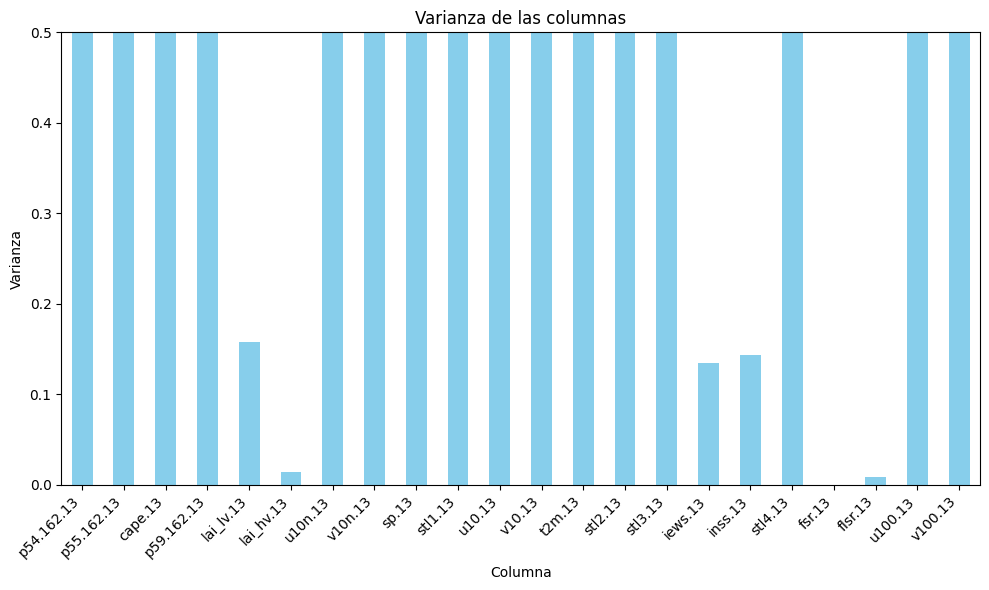

In [8]:
print('Varianza de las variables')
print(x.var())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
x.var().plot(kind='bar', color='skyblue')
plt.title('Varianza de las columnas')
plt.xlabel('Columna')
plt.ylabel('Varianza')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0, 0.5)
plt.show()

Como se puede ver con estos resultados, hay algunas variables que tienen una varianza muy pequeña, como fsr.13. Esto podría sugerir que los datos de estas variables son muy parecidos y no estarían influyendo mucho al determinar la variable de salida. Con algunos de los modelos que crearemos posteriormente podremos cauntificar la importancia de las variables a la hora de predecir la salida y comprobar si estas variables tienen poca importancia, en cuyo podría considerarse su eliminación.

A continuación vamos a estudiar la correlación entre las variables. Utilizaremos un mapa de calor para representar la correlación entre variables.

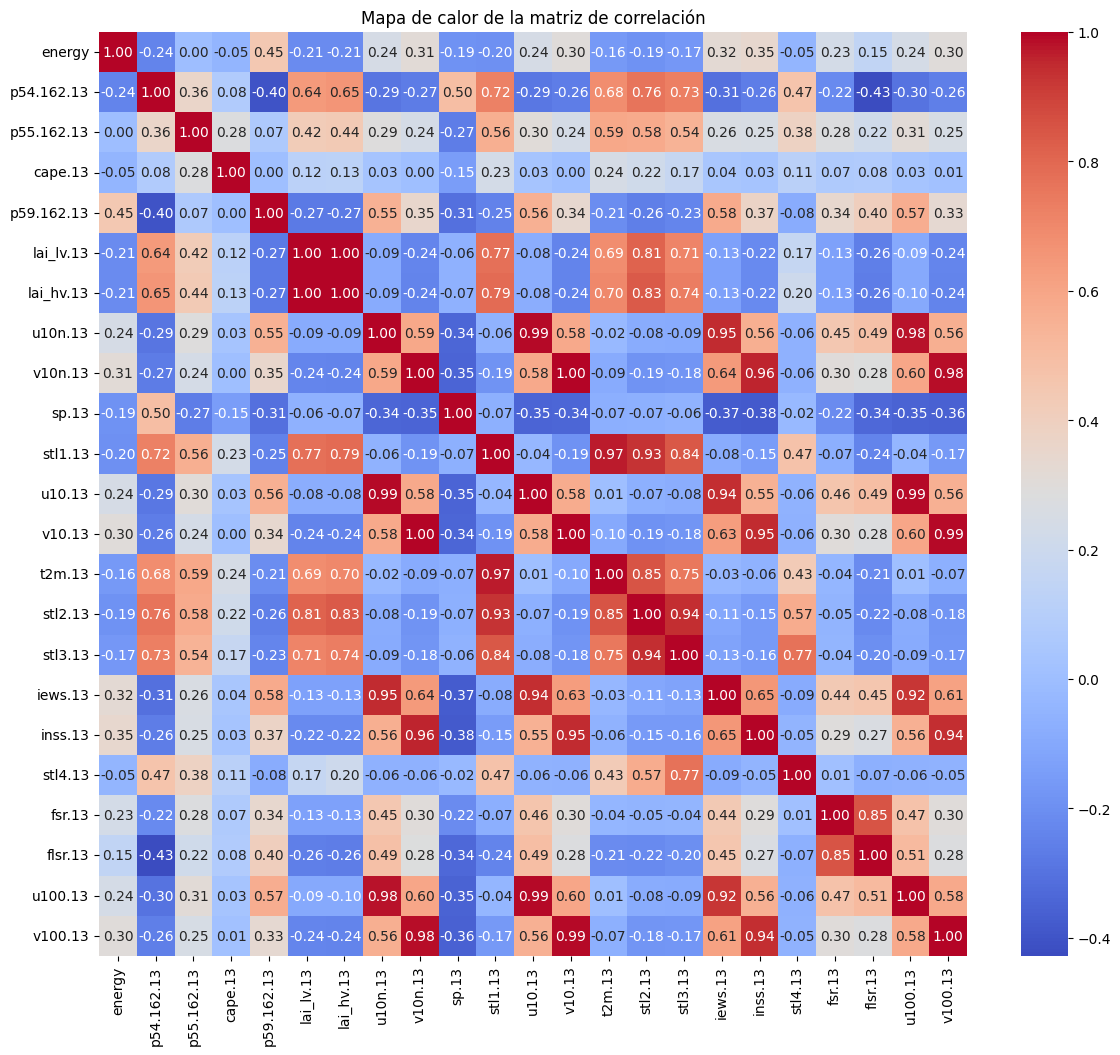

In [10]:
x_copia = x.copy()
x_copia.insert(0, "energy", y)

# Crear el mapa de calor
plt.figure(figsize=(14, 12))
sns.heatmap(x_copia.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

Las casillas de color rojo oscuro corresponden a las varibles con más correlación. Con este mapa se pueden sacar dos tipos de conclusiones: 

- Correlación con la variable de salida: la primera fila y columna del gráfico corresponden con la correlación entre cada una de las variables de entrada y la variable de salida. Los valores más altos, tanto positivos como negativos, podrían indicar que esas características son más importantes para determinar el valor de la variable de salida.

- Correlación entre las variables de entrada: dos variables con una alta correlación pueden estar dando la misma información al modelo, por lo que se podría descartar una de ellas.

En principio no vamos a eliminar ninguna variable y vamos a tratar de obtener el mejor modelo con todas las variables que tenemos. Más adelante, con el mejor modelo podemos probar a eliminar algunas características y ver como afecta al error.

### Análisis de la variable de salida

Para determinar si es un problema de regresión o de clasificación, estudiaremos la variables de salida *energy*

In [11]:
print('La variable de salida es de tipo:')
print('===============================')
y.info()

La variable de salida es de tipo:
<class 'pandas.core.series.Series'>
RangeIndex: 4748 entries, 0 to 4747
Series name: energy
Non-Null Count  Dtype  
--------------  -----  
4748 non-null   float64
dtypes: float64(1)
memory usage: 37.2 KB


La variable de salida es de tipo float64, es decir, es una variable continua, por lo que es un problema de regresión. Continuaremos analizando la distribución de la variable de salida.

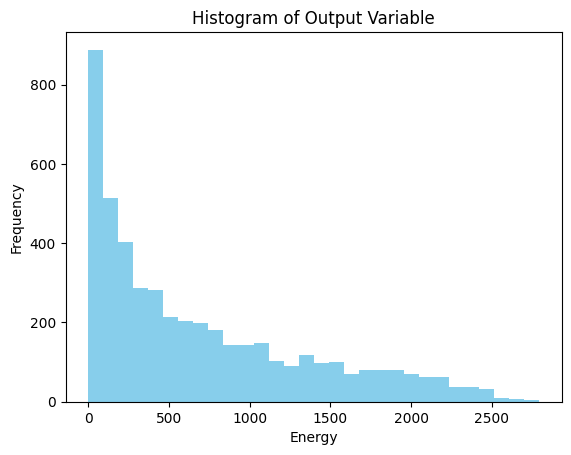

In [14]:
plt.hist(y, bins=30, color='skyblue')
plt.title('Histogram of Output Variable')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

Como podemos observar, la variable de salida tiene una distribución desbalanceado. Esto indica que para valores de poca energía hay muchas más muestras que para valores mayores. Para el modelo de regresión esto no supondrá un problema, pero a la hora de hacer una clasificación necesitaremos balancear los datos.

## Evalucaión

- Evaluación outer: evaluación para estimar el rendimiento del modelo. Para esta evaluación vamos a usar el método Holdout, donde dividiremos el conjunto de datos en dos, uno para entrenar y otro para comprobar el modelo. El conjunto de entrenamiento es 2/3 del conjunto total.
- Evaluación inner: evaluación para ajustar los hiperparámetros del modelo. Utilizaremos k-fold crossvalidation para esta evaluación. Para la búsqueda de los hiperparámetros utilizaremos GridSearch, a menos que haya modelos con muchas combinaciones donde usaremos la búsqueda aleatoria.

Hemos decidido esta combinación de métodos ya que consideramos que proporciona una evaluación robusta y utiliza los recursos de forma eficiente.

Primero evaluaremos los modelos con sus hiperparámetros por omisión. Depués ajustaremos los hiperpárametros. Al final incluiremos unas conclusiones sobre qué modelos son mejores y cuáles tardan menos tiempo.

Para la evaluación dividimo el conjunto de datos en train y test.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state=100472037)

Para evaluar los modelos cacularemos:
- RMSE. Utilizamos el rmse en vez del mse para mantener la escala de la variable de salida y ver de forma más clara la maginitud del error. 
- R2. Utilizamos el coeficiente de determinación para calcular la proporción de la varianza de la variable de salida que se puede explicar con el modelo. Valores más altos R2 indican que el modelo es más explicable.
- Timepo de entrenamiento. Hay modelos que pueden tardar mucho en entrenarse.

In [17]:
#Error cuadrático medio
def rmse(y_test, y_test_pred):
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

#coeficiente de determinación
def r2(y_test, y_test_pred):
    return metrics.r2_score(y_test, y_test_pred)

### Preproceso

Hay ciertos modelos que exigen un preproceso de los datos. Debido a esto utilizaremos un pipeline que realizará primero el preproceso de los datos y depués definirá el modelo.

Para el preproceso definiremos varias formas de normalizar lo datos. Más adelantes utilizaremos KNN para determinar la mejor fomra de normalizar los datos, que utilizaremos en todo el resto de modelos.

In [14]:
#normalización standard
standar = make_column_transformer(
    (StandardScaler(), X_train.columns),
)

#normalizacion por escala min-max
min_max = make_column_transformer(
    (MinMaxScaler(), X_train.columns)
)

### Dummy

Para una primera aproximación realizaremos el RegresorDummy basado en la media. Este es un modelo trivial y todos los modelos que hagamos más adelante deberían mejorar el resultado de este.

In [15]:
# Crear un modelo de referencia usando el dummy
modelo_dummy = DummyRegressor(strategy='mean')
t1 = time.time()
modelo_dummy.fit(X_train, y_train)
t2 = time.time()

# Calcular el error cuadrático medio y el coeficiente de determinación 
rmse_mean = rmse(y_test, modelo_dummy.predict(X_test))
r2_mean = r2(y_test, modelo_dummy.predict(X_test))
t_dummy_mean = t2-t1

print(f"RMSE de dummy(mean): {rmse_mean}")
print(f"R^2 de dummy(mean): {r2_mean}")
print("Tiempo de entrenamiento: ", t2 - t1)

RMSE de dummy(mean): 667.6287990469438
R^2 de dummy(mean): -0.0012269034359306819
Tiempo de entrenamiento:  0.0015528202056884766


A continuación vamos a crear el regrsor dummy basado en la mediana para comprar los resultados.

In [16]:
modelo_dummy_median = DummyRegressor(strategy='median')
t1 = time.time()
modelo_dummy_median.fit(X_train, y_train)
t2 = time.time()

rmse_median= rmse(y_test, modelo_dummy_median.predict(X_test))
r2_median = r2(y_test, modelo_dummy_median.predict(X_test))
t_dummy_median = t2-t1

print(f"RMSE de dummy(mean): {rmse_median}")
print(f"R^2 de dummy(mean): {r2_median}")
print("Tiempo de entrenamiento: ", t2 - t1)

RMSE de dummy(mean): 696.231776442723
R^2 de dummy(mean): -0.08885504571728964
Tiempo de entrenamiento:  0.002857208251953125


En este caso, el regresor basado en la media tiene menor error. También se puede observar que al ser modelos muy simples tardan poco en ejecutarse.

### KNN

KNN es un algoritmo de aprendizaje automático supervisado que se basa en predecir el valor de salida de una instancia en función de los valores de sus K vecinos más cercanos.

Para poder usar este modelo primero debemos normalizar los datos. Vamos a comprobar cual de las normalizaciones definidas anteriores es más adeaucda para este modelo, es decir, produce menor error.

In [19]:
pipe_knn_st = Pipeline([
        ('preproceso', standar), #entrada del pipeline
        ('regresor', KNeighborsRegressor()) #salida del pipeline
])

np.random.seed(100472037)

t1 = time.time()
pipe_knn_st.fit(X_train, y_train)
t2 = time.time()

y_test_pred = pipe_knn_st.predict(X_test)

rmse_knn_st = rmse(y_test, y_test_pred)
r2_knn_st = r2(y_test, y_test_pred)
t_knn_st = t2 - t1
print(f"RMSE: {rmse_knn_st}")
print(f"R2: {r2_knn_st}")
print("Tiempo de entrenamiento: ", t_knn_st)

RMSE: 402.4666157668746
R2: 0.6361502255960982
Tiempo de entrenamiento:  0.018745899200439453


In [21]:
pipe_knn = Pipeline([
        ('preproceso', min_max), #entrada del pipeline
        ('regresor', KNeighborsRegressor()) #salida del pipeline
])

np.random.seed(100472037)

t1 = time.time()
pipe_knn.fit(X_train, y_train)
t2 = time.time()

y_test_pred = pipe_knn.predict(X_test)

rmse_knn = rmse(y_test, y_test_pred)
r2_knn =r2(y_test, y_test_pred)
t_knn = t2 - t1
print(f"RMSE: {rmse_knn}")
print(f"R2: {r2_knn}")
print("Tiempo de entrenamiento: ", t_knn)

RMSE: 418.2405057451519
R2: 0.6070705608374711
Tiempo de entrenamiento:  0.009194612503051758


Hemos comprobado que la mejor normalización es la estándar porque produce un menor error y el coeficiente de determinación es también un pooco mejor.Esta es la normalización que usaremos en el resto de modelos que lo necesiten.

A continuación vamos a ajustar los siguientes hiperparametros:

- Número de vecinos: utilizaremos un rango entre 2 y 20 para determinar el número de vecinos más óptimo.
- Métrica de distancia: para determinar la distancia entre instancias se pueden utilizar diferentes métricas como la euclídea, la manhattan o chebyshev (diferencia máxima entre las coordenadas de dos puntos). 

In [21]:
# Search space
param_grid = {
    'regresor__n_neighbors': list(range(2, 20)),  # Número de vecinos
    'regresor__metric': ['euclidean', 'manhattan', 'chebyshev']  # Métrica de distancia
}

# Inner evaluation
inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

pipe_knn_hp = GridSearchCV(pipe_knn_st,
                           param_grid,
                           scoring='neg_mean_squared_error',
                           cv=inner,
                           n_jobs=-1, verbose=1)

t1 = time.time()
pipe_knn_hp.fit(X_train, y_train)
t2 = time.time()

y_test_pred = pipe_knn_hp.predict(X_test)

rmse_knn_hp = mean_squared_error(y_test, y_test_pred, squared=False)
r2_knn_hp = pipe_knn_hp.best_estimator_.score(X_test, y_test)
t_knn_hp = t2 - t1
print(f"RMSE: {rmse_knn_hp}")
print(f"R2: {r2_knn_hp}")
print("Tiempo de entrenamiento: ", t_knn_hp)
print("Mejores parámetros:", pipe_knn_hp.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


RMSE: 395.27881690722984
R2: 0.6490304262327193
Tiempo de entrenamiento:  11.399507999420166
Mejores parámetros: {'regresor__metric': 'manhattan', 'regresor__n_neighbors': 9}


Se puede observar que ajustando el número de vecinos a 8 y usando la distancia manhattan se mejora el error del modelo. Dentro del rango utilizado, el valor del número de vecinos no se encuentra en el extremo. Con este modelo el error mejora mucho con respecto al regresor trivial, al igual que R2.

### Arboles de regresión

In [23]:
#!pip install --upgrade linear-tree

El siguinete modelo que vamos a evaluar es un árbol de regresión lineal. Hemos decidido utilizar la implementación de los árboles de la librería 'linear-tree' ya que generan un modelo mejor que los de sklearn. Primero crearemos el modelo sin ajustar los hiperpárametros.

In [22]:
regr = LinearTreeRegressor(base_estimator=LinearRegression())
np.random.seed(100472037) 

t1 = time.time()
regr.fit(X_train, y_train)
t2 = time.time()

y_test_pred = regr.predict(X_test)

rmse_tree = rmse(y_test, y_test_pred)
r2_tree = r2(y_test, y_test_pred)
t_tree = t2 - t1
print(f"RMSE: {rmse_tree}")
print(f"R2: {r2_tree}")
print("Tiempo de entrenamiento: ", t_tree)

Aún sin haber ajustado los hiperparámetros, podemos observar que este modelo tine menor error que el modelo dummy, aunque tarda más en ejecutarse. Ahora vamos a estudiar el ajuste de los hiperparámetros para minimizar el error.

In [25]:
# Search space
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(4,16,2))}

# Inner evaluation
inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

regr_hp = GridSearchCV(LinearTreeRegressor(base_estimator=LinearRegression()),
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner,
                         n_jobs=-1, verbose=1,
                        )
np.random.seed(100472037)

t1 = time.time()
regr_hp.fit(X=X_train, y=y_train)
t2 = time.time()

y_test_pred = regr_hp.predict(X_test)

rmse_tree_hp = rmse(y_test, y_test_pred)
r2_tree_hp = r2(y_test, y_test_pred)
t_tree_hp = t2 -t1
print(f"RMSE: {rmse_tree_hp}")
print(f"R2: {r2_tree_hp}")
print("Tiempo de entrenamiento: ", t2 - t1)
regr_hp.best_params_, -regr_hp.best_score_

Fitting 3 folds for each of 42 candidates, totalling 126 fits


RMSE: 373.98860391251424
R2: 0.6858195744419211
Tiempo de entrenamiento:  129.16412329673767


({'max_depth': 4, 'min_samples_split': 6}, 152601.30994544283)

### Regresores lineales

Primero crearemos el regresor lineal normal sin ninguna regularización y obtendremos el error de este modelo.

In [26]:
# Creación y entrenamiento del modelo lineal con la normalización standar
# ==============================================================================
pipe_regr_standar = Pipeline([
        ('preproceso', standar), #entrada del pipeline
        ('regresor', LinearRegression()) #salida del pipeline
])
np.random.seed(100472037)

t1 = time.time()
pipe_regr_standar.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_regr_standar.predict(X_test)

rmse_lineal = rmse(y_test, y_test_pred)
r2_lineal = r2(y_test, y_test_pred)
t_lineal = t2 - t1
print(f"RMSE: {rmse_lineal}")
print(f"R2: {r2_lineal}")
print("Tiempo de entrenamiento: ", t_lineal)

RMSE: 547.6271133290638
R2: 0.3263531698314581
Tiempo de entrenamiento:  0.028280973434448242


Como era de esperar, el regresor lineal mejora los valores del modelo dummy. Sin embargo, en este modelo no se ha utilizado ninguna regularización para controlar el sobreaprendizaje. A continuación, vamos a crear modelos con distintas regularizaciones para comprobar cual es la mejor.

#### Lasso


Primero crearemos el modelo con la regularización Lasso sin ajuste de hiperparámetros.

In [27]:
pipe_lasso = Pipeline([
        ('preproceso', standar), #entrada del pipeline
        ('regresor', Lasso()) #salida del pipeline
])
np.random.seed(100472037)

t1 = time.time()
pipe_lasso.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_lasso.predict(X_test)

rmse_lasso = rmse(y_test, y_test_pred)
r2_lasso = r2(y_test, y_test_pred)
t_lasso = t2 -t1
print(f"RMSE: {rmse_lasso}")
print(f"R2: {r2_lasso}")
print("Tiempo de entrenamiento: ", t_lasso)
#print(f"Mejor aplpha: {pipe_lasso['regresor'].alpha_}")

RMSE: 548.349172807975
R2: 0.32457555969869323
Tiempo de entrenamiento:  0.09209704399108887


Vamos a ajustar el hiperparámetro alpha del modelo para observar los resultadod

In [28]:
pipe_regrLasso = Pipeline([
        ('preproceso', standar), #entrada del pipeline
        ('regresor', LassoCV(alphas = np.logspace(-3, 3, 110),cv= 3)) #salida del pipeline
])
np.random.seed(100472037)
t1 = time.time()
pipe_regrLasso.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_regrLasso.predict(X_test)

rmse_lasso_hp = rmse(y_test, y_test_pred)
r2_lasso_hp = r2(y_test, y_test_pred)
t_lasso_hp = t2 - t1
print(f"RMSE: {rmse_lasso_hp}")
print(f"R2: {r2_lasso_hp}")
print("Tiempo de entrenamiento: ", t2 - t1)
print(f"Mejor aplpha: {pipe_regrLasso['regresor'].alpha_}")


RMSE: 547.6400288924752
R2: 0.3263213940820864
Tiempo de entrenamiento:  0.6187751293182373
Mejor aplpha: 0.20508155677140627


El ajuste de hiperparámetros mejora el modelo, pero no es una mejora muy significativa.

Con la regularización Lasso los coeficientes de las variables pueden llegar a valor 0. En el siguiente gráfico se muestra el valor de las coeficientes de las variables a medida que aumenta la regularización. Cuanto mayor es el valor de alpha más variables quedan excluídas, es decir, su coeficiente es 0.

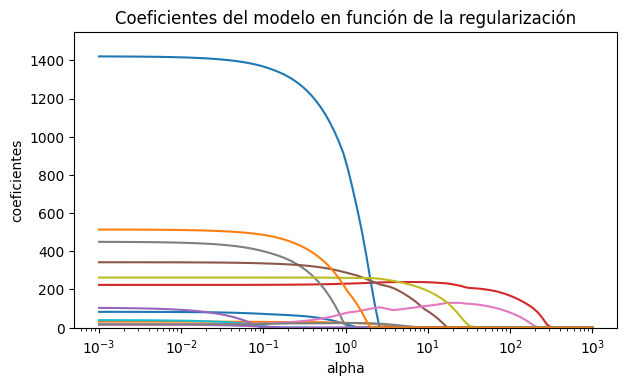

In [29]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = pipe_regrLasso['regresor'].alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Pipeline([
        ('preproceso', standar),
        ('regresor', Lasso(alpha=alpha, fit_intercept=False))
    ])
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp['regresor'].coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-2.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

También podemos observar la evolución del error en función del valor de alpha y ver que el valor óptimo del error está alrededor de 0.205. Si se sigue aumentando el valor de alpha el error aumenta.

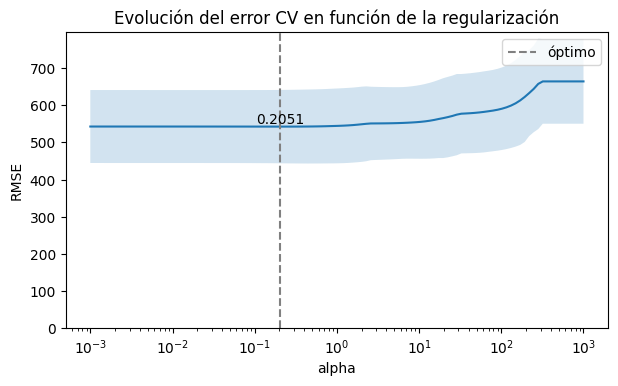

In [30]:
# Evolución del error en función de alpha
# ==============================================================================
# regrLasso.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = pipe_regrLasso['regresor'].mse_path_.mean(axis=1)
mse_sd = pipe_regrLasso['regresor'].mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = pipe_regrLasso['regresor'].alphas_[np.argmin(rmse_cv)]
optimo_1sd   = pipe_regrLasso['regresor'].alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(pipe_regrLasso['regresor'].alphas_, rmse_cv)
ax.fill_between(
    pipe_regrLasso['regresor'].alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')

ax.text(optimo, min_rmse, f'{optimo:.4f}', ha='center', va='bottom')
plt.legend();

#### Ridge

La siguiente regularización que vamos a probar es la regularización Ridge. Primero lo haremos sin ajustar hiperparámetros.

In [31]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
pipe_Ridge = Pipeline([
        ('preproceso', min_max),
        ('regresor', Ridge(
         ))
])

np.random.seed(42)
t1 = time.time()
pipe_Ridge.fit(X_train, y_train) #entrena
t2 = time.time()
t_ridge = t2 - t1
y_test_pred = pipe_Ridge.predict(X_test)

rmse_ridge = rmse(y_test, y_test_pred)
r2_ridge= r2(y_test, y_test_pred)
print(f"RMSE: {rmse_ridge}")
print(f"R2: {r2_ridge}")
print("Tiempo de entrenamiento: ", t_ridge)

RMSE: 551.6182371896022
R2: 0.31649826965590244
Tiempo de entrenamiento:  0.018115520477294922


A continuación vamos a generar un modelo Ridge ajustando sus hiperparámetros.

In [32]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
pipe_regrRidge = Pipeline([
        ('preproceso', min_max),
        ('regresor', RidgeCV(
            alphas          = np.logspace(-3, 6, 200),
            fit_intercept   = True,
            store_cv_values = True
         ))
])

np.random.seed(42)
pipe_regrRidge.fit(X_train, y_train)
t1 = time.time()
pipe_regrRidge.fit(X_train, y_train) #entrena
t2 = time.time()
t_ridge_hp = t2 - t1
y_test_pred = pipe_regrRidge.predict(X_test)

rmse_ridge_hp = rmse(y_test, y_test_pred)
r2_ridge_hp = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_ridge_hp}")
print(f"R2: {r2_ridge_hp}")
print("Tiempo de entrenamiento: ", t2 - t1)
print(f"Mejor aplpha: {pipe_regrRidge['regresor'].alpha_}")


RMSE: 547.4027700804357
R2: 0.32690499481870594
Tiempo de entrenamiento:  0.16745853424072266
Mejor aplpha: 0.007232633896483534


A continuación, vamos a ver cómo evolucionan los coeficientes de las variables con esta regularización. A diferencia de la regularización Lasso, con la regularización ridge los coeficientes dismunuyen pero nunca llega a 0.

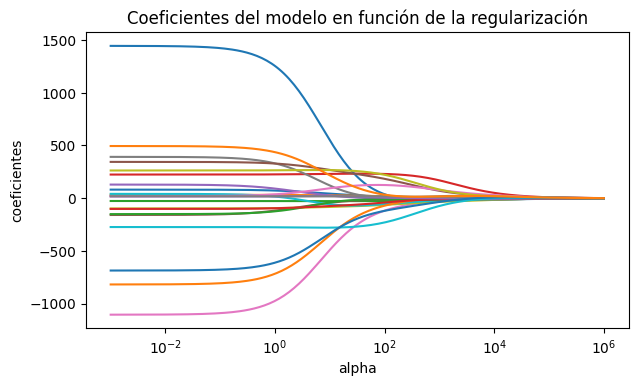

In [33]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = pipe_regrRidge['regresor'].alphas

coefs = []

for alpha in alphas:
    modelo_temp = Pipeline([
        ('preproceso', standar),
        ('regresor', Ridge(alpha=alpha, fit_intercept=False))
    ])
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp['regresor'].coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

También podemos ver la evolución del error con la regularización y ver que el valor óptimo del error está alrededor de 0.007. Para valores mayores de alpha el error aumenta.

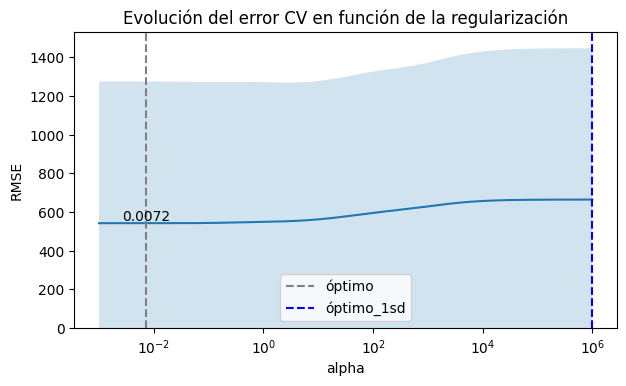

In [34]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = pipe_regrRidge['regresor'].cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = pipe_regrRidge['regresor'].cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = pipe_regrRidge['regresor'].alphas[np.argmin(rmse_cv)]
optimo_1sd   = pipe_regrRidge['regresor'].alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(pipe_regrRidge['regresor'].alphas, rmse_cv)
ax.fill_between(
    pipe_regrRidge['regresor'].alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)


ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
ax.text(optimo, min_rmse, f'{optimo:.4f}', ha='center', va='bottom')
plt.legend();

#### Elastic Net

Por último, vamos a generar el modelo Elastic Net

In [35]:
# ==============================================================================
# Por defecto ElasticNetCV utiliza el mean squared error
pipe_regrElastic = Pipeline([
        ('preproceso', min_max),
        ('regresor', ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            cv              = 3)
        )
])

np.random.seed(100472037)
t1 = time.time()
pipe_regrElastic.fit(X_train, y_train) #entrena
t2 = time.time()
t_en = t2 - t1
y_test_pred = pipe_regrElastic.predict(X_test)

rmse_en = rmse(y_test, y_test_pred)
r2_en = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_en}")
print(f"R2: {r2_en}")
print("Tiempo de entrenamiento: ", t_en)
print(f"Mejor aplpha: {pipe_regrElastic['regresor'].alpha_}")


RMSE: 547.3884781393232
R2: 0.32694014154839957
Tiempo de entrenamiento:  5.178627014160156
Mejor aplpha: 0.00029331662783900486


Este modelo combina las dos regularizaciones lineales vistas anteriormente y es el modelo lineal que mejor error produce.

#### Comparación

Aunque hemos podido ir viendo los errores de cada modelo, vamos a mostrarlos en el siguiente gráfico, teniendo en cuanta los modelos con los hiperparámetros ajustados.

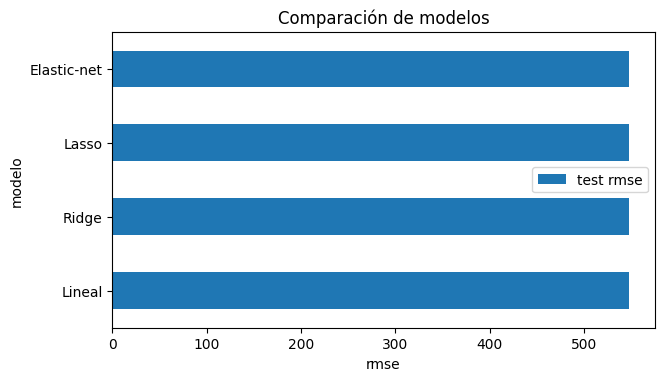

In [36]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_lineal, rmse_ridge_hp, rmse_lasso_hp, rmse_en]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

En este problema no hay mucha diferencia entre el modelo lineal y los modelos regularizados en cuanto al rmse. Vamos a comprobar los valores de los coeficientes con cada modelo para ver como cambia la importancia de cada variable.

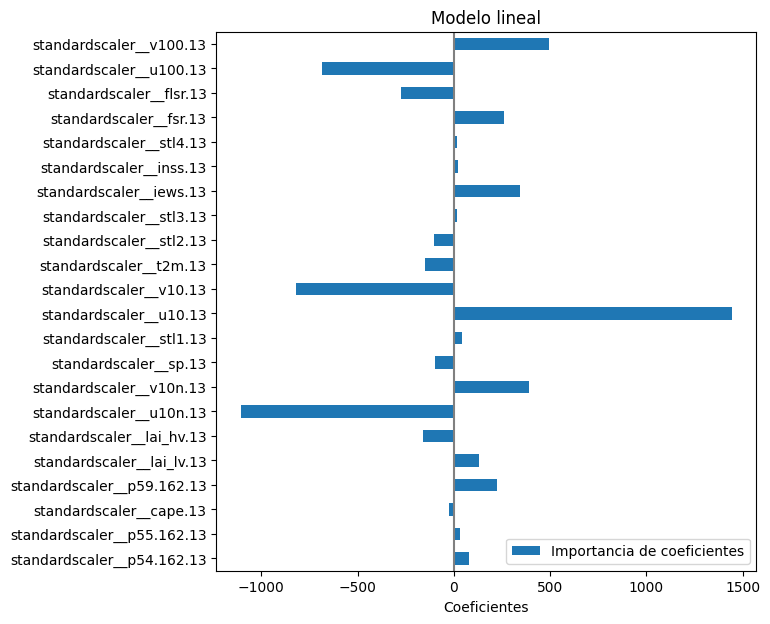

In [37]:
feature_names = pipe_regr_standar[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    pipe_regr_standar['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Modelo lineal")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

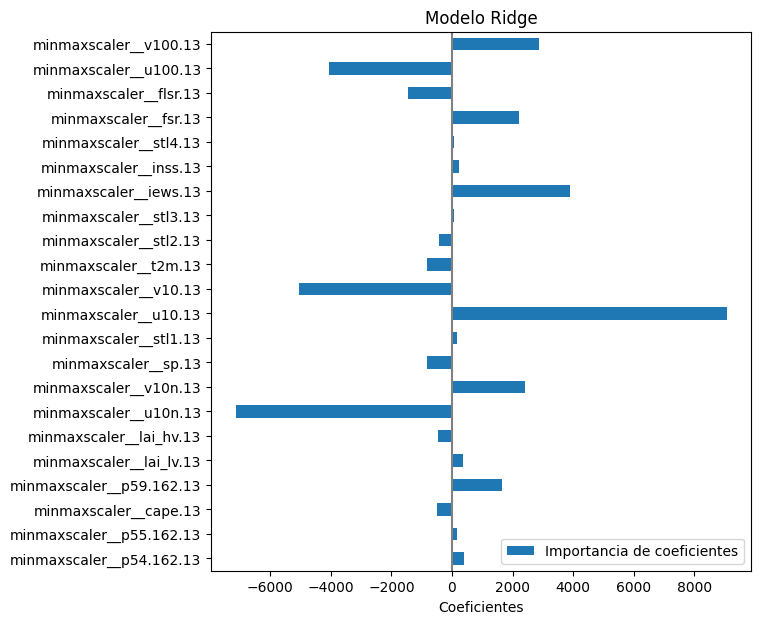

In [38]:
feature_names = pipe_regrRidge[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    pipe_regrRidge['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Modelo Ridge")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

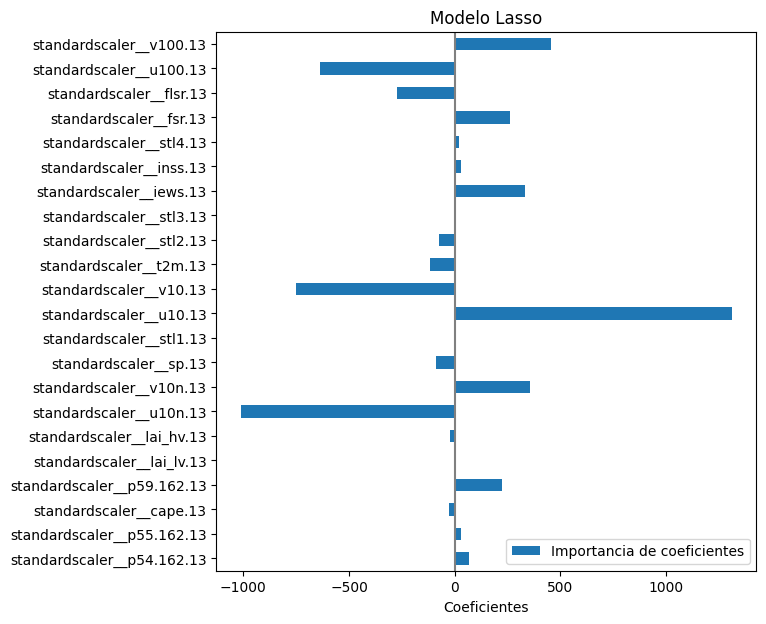

In [39]:
feature_names = pipe_regrLasso[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    pipe_regrLasso['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Modelo Lasso")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

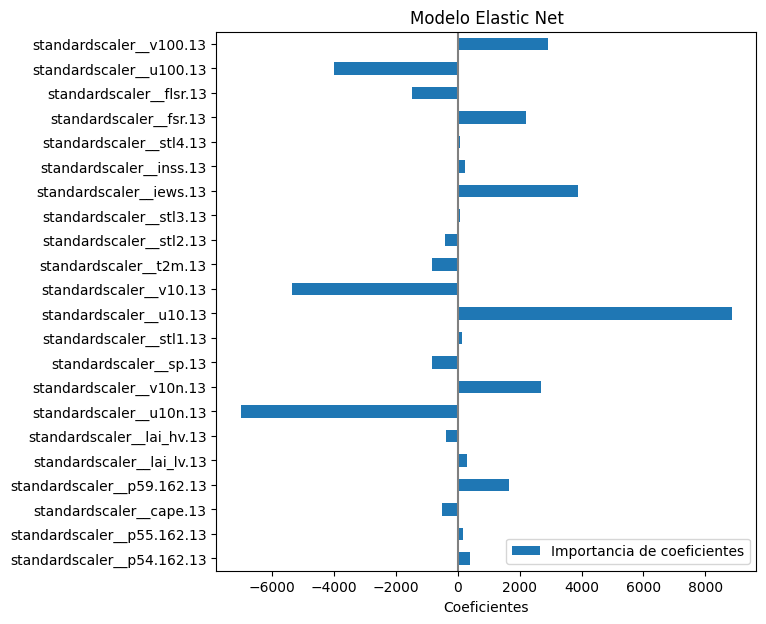

In [40]:
coefs = pd.DataFrame(
    pipe_regrElastic['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Modelo Elastic Net")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Tampoco varía mucho la importancia de los coeficientes, pero se puede observar que con el modelo de Lasso algunos de los coeficientes llegan a valer 0.

### SVM

Para crear este modelo, primero debemos normalizar los datos utilizando la normalización standar. Primero vamos a hacer un modelo SVR con un kernel lineal sin ajustar sus hiperparámetros.

In [41]:
# Creación del modelo SVM
# ==============================================================================
modeloSVR = SVR(kernel = 'linear')

pipe_regr_lineal = Pipeline([
    ('escalar', standar),
    ('SVM', modeloSVR)
])

np.random.seed(100472037)
t1 = time.time()
pipe_regr_lineal.fit(X_train, y_train) #entrena
t2 = time.time()
t_svm_lineal = t2 -t1
y_test_pred = pipe_regr_lineal.predict(X_test)

rmse_svm = rmse(y_test, y_test_pred)
r2_svm = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_svm}")
print(f"R2: {r2_svm}")
print("Tiempo de entrenamiento: ", t_svm_lineal)

RMSE: 590.3226215492126
R2: 0.21721726519356954
Tiempo de entrenamiento:  0.6130468845367432


A continuación proceedemos a realizar el ajuste de hiperparámetros para tratar de mejorar el modelo.


In [42]:
param_grid = {'SVM__C': [0.1, 1, 10, 100, 1000, 10000]}


inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

svm_lineal_hp = GridSearchCV(pipe_regr_lineal,
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=inner,
                        n_jobs=4, verbose=1)


np.random.seed(100472037)
t1 = time.time()
svm_lineal_hp.fit(X=X_train, y=y_train)
t2 = time.time()
t_svm_lineal_hp = t2 -t1
y_test_pred = svm_lineal_hp.predict(X_test)

rmse_svm_hp = rmse(y_test, y_test_pred)
r2_svm_hp = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_svm_hp}")
print(f"R2: {r2_svm_hp}")
print("Tiempo de entrenamiento: ", t_svm_lineal_hp)
svm_lineal_hp.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
RMSE: 580.4898723024722
R2: 0.24307703760644728
Tiempo de entrenamiento:  36.33040118217468


{'SVM__C': 10000}

El último modelo que vamos a probar es un SVM pero con un kernel radial. Primero lo haremos sin ajustar los hiperparámetros

In [43]:
# Creación del modelo SVM radial
# ==============================================================================
modeloSVR = SVR()

pipe_regr_radial = Pipeline([
    ('escalar', standar),
    ('SVM', modeloSVR)
])

np.random.seed(100472037)
t1 = time.time()
pipe_regr_radial.fit(X_train, y_train) #entrena
t2 = time.time()
t_svm_radial = t2 -t1
y_test_pred = pipe_regr_radial.predict(X_test)

rmse_svm = rmse(y_test, y_test_pred)
r2_svm = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_svm}")
print(f"R2: {r2_svm}")
print("Tiempo de entrenamiento: ", t_svm_radial)

RMSE: 637.255997841405
R2: 0.08779961814909787
Tiempo de entrenamiento:  0.6500873565673828


Ahora ajustaremos el hiperparámetro C para intentar conseguir un modelo mejor.

In [44]:
param_grid = {'SVM__C': [0.1, 1, 10, 100, 1000, 10000]}


inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

svm_radial_hp = GridSearchCV(pipe_regr_radial,
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=inner,
                        n_jobs=4, verbose=1)


np.random.seed(100472037)
t1 = time.time()
svm_radial_hp.fit(X=X_train, y=y_train)
t2 = time.time()
t_svm_radial_hp = t2 -t1
y_test_pred = svm_radial_hp.predict(X_test)

rmse_svm_r_hp = rmse(y_test, y_test_pred)
r2_svm_r_hp = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_svm_r_hp}")
print(f"R2: {r2_svm_r_hp}")
print("Tiempo de entrenamiento: ", t_svm_radial_hp)
svm_radial_hp.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


RMSE: 358.5111651320538
R2: 0.7112860575307952
Tiempo de entrenamiento:  8.456178426742554


{'SVM__C': 1000}

En este caso, el ajuste de hiperparámetros ha mejorado mucho el resultado, tanto que es el modelo con menor error de todos los que se han probado.

### Comparación de modelos

Para comparar los errores y tiempos de ejecución de los modelos, lo mostraremos en la siguiente gráfica. Las barras azules representan el rmse mientras que los puntos rojos representan el tiempo de ejecución, cada uno en su escala correspondiente.

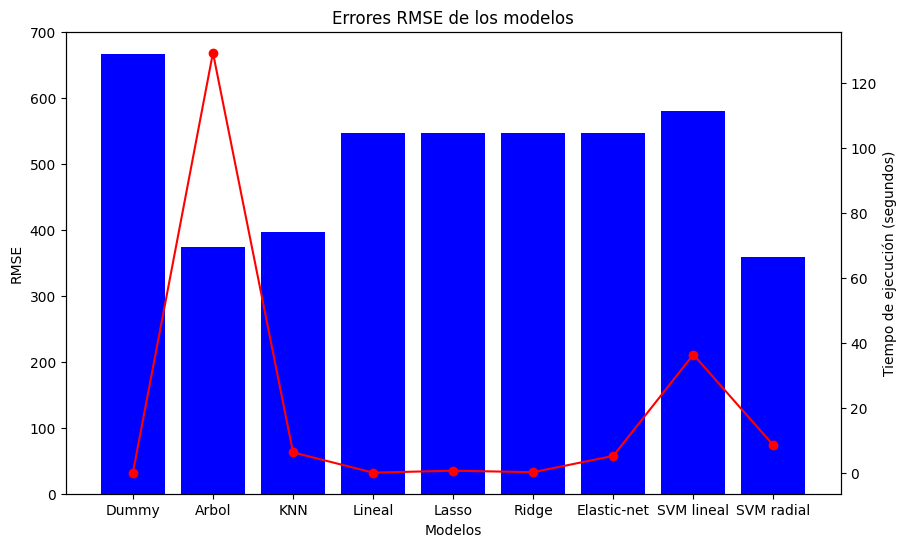

In [45]:
# Lista de modelos y errores RMSE
modelos = ['Dummy', 'Arbol','KNN','Lineal', 'Lasso', 'Ridge', 'Elastic-net', 'SVM lineal', 'SVM radial']
rmse = [rmse_mean, rmse_tree_hp, rmse_knn_hp, rmse_lineal, rmse_lasso_hp, rmse_ridge_hp, rmse_en, rmse_svm_hp, rmse_svm_r_hp]

# Tiempo de ejecución de cada modelo (ejemplo)
tiempo_ejecucion = [t_dummy_mean, t_tree_hp, t_knn_hp, t_lineal, t_lasso_hp, t_ridge_hp, t_en, t_svm_lineal_hp, t_svm_radial_hp]

# Crear gráfico de barras
fig, ax1 = plt.subplots(figsize = (10, 6))

# Configurar ejes y etiquetas
ax1.bar(modelos, rmse, color='blue')
ax1.set_xlabel('Modelos')
ax1.set_ylabel('RMSE')
ax1.set_title('Errores RMSE de los modelos')

# Crear segundo eje y para el tiempo de ejecución
ax2 = ax1.twinx()
ax2.plot(modelos, tiempo_ejecucion, color='red', marker='o')
ax2.set_ylabel('Tiempo de ejecución (segundos)')

# Mostrar gráfico
plt.show()


A partir de los modelos desarrollados, se pueden obtener las siguientes conclusiones:
- Todos los modelos mejoran el resultado del modelo trivial. Esto era lo esprable ya que el modelo trivial solo usaba la media para dar un resultado.
- El modelo que más ha mejorado el error cuadrático medio ha sido el SVM con kernel radial después de haber ajustado sus hiperparámetros. Además, el timepo de ejecución de este modelo no es mucho más alto que el resto.
- El siguiente modelo que obtenía mejor error era el árbol de regresión pero tiene un timepo de ejecucución mucho más alto que el resto.
- Los modelos de regresión lineal son muy parecidos en cuanto a tiempo de ejecución y error.
El modelo que vamos a usar a partir de ahora es el SVM radial porque es el que da mejores resultados.

## Modelo final

El modelo final que vamos a usar es el SVM radial con normalización estándar de los datos. Como hemos podido comporbar antes, el mejor valor del hiperparámetro C es 1000, por lo que es el que utilizaremos en el modelo. La estimación del error es la siguiente.

In [48]:
# Creación del modelo SVM radial
# ==============================================================================
modeloSVR = SVR(C= 1000)

pipe_regr_radial = Pipeline([
    ('escalar', standar),
    ('SVM', modeloSVR)
])

np.random.seed(100472037)
t1 = time.time()
pipe_regr_radial.fit(X_train, y_train) #entrena
t2 = time.time()
t_svm_radial = t2 -t1
y_test_pred = pipe_regr_radial.predict(X_test)

rmse_svm = rmse(y_test, y_test_pred)
r2_svm = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_svm}")
print(f"R2: {r2_svm}")
print("Tiempo de entrenamiento: ", t_svm_radial)

RMSE: 358.5111651320538
R2: 0.7112860575307952
Tiempo de entrenamiento:  1.2414791584014893


Para entrenar el modelo final se utilizan todos los datos proporcionados, sin hacer la división entra train y test.

In [49]:
from joblib import dump
modeloSVR = SVR(C= 1000)

modelo_final = Pipeline([
    ('escalar', standar),
    ('SVM', modeloSVR)
])

np.random.seed(100472037)
t1 = time.time()
modelo_final.fit(x, y)
t2 = time.time()
t_final = t2 - t1
# Guardar el modelo entrenado en un archivo .pkl
print("Tiempo de entrenamiento: ", t_final)
dump(modelo_final, 'modelo_final.pkl')

Tiempo de entrenamiento:  2.9371747970581055


['modelo_final.pkl']

Ahora vamos a usar el modelo para obtener predicciones sobre los datos de la competición y almacenarlos en un archivo "predicciones.csv"

In [50]:
# Paso 1: Cargar el conjunto de datos de la competición
competicion_data = pd.read_csv('wind_ava.csv.gz', compression="gzip")

# Paso 2: Obtener predicciones utilizando el modelo final
predicciones = modelo_final.predict(competicion_data)

# Paso 3: Guardar las predicciones en un archivo
predicciones_df = pd.DataFrame(predicciones, columns=["Prediccion"])
predicciones_df.to_csv("predicciones.csv", index=False)

### Otros modelos de clasificación


Aunque no se pide en el enunciado, queríamos probar varios modelos extras para ver como se corpotan y si mejoran los resultados.

#### Random Forest
Este modelo se basa en construir varios árboles de decisión durante el entrenamiento y combinar sus predicciones para obtener un resultado final más robusto y preciso.
Esperamos que este modelo mejore bastante los resultados obtenidos en los apartados anteriores pero tambien tardará más en ejecutarse.
Primero crearemos el modelo sin ajustar hiperparámetros.

In [7]:
# Creación del modelo
# ==============================================================================
regr_rf = RandomForestRegressor(
            n_estimators = 10,
            max_depth    = None,
            max_features = 1.0,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 100472037
         )

# Entrenamiento del modelo
# ==============================================================================
t1 = time.time()
regr_rf.fit(X_train, y_train)
t2 = time.time()
t_rf = t2 - t1
print(f"RMSE de RF: {rmse(y_test, regr_rf.predict(X=X_test))}")
print("Tiempo de entrenamiento: ", t_rf)

RMSE de RF: 384.06796649989076
Tiempo de entrenamiento:  0.20523810386657715


Aunque no es el mejor valor de error que hemos obtenido, es un valor muy bueno teniendo en cuenta que no hemos ajustado los hiperparámetros. Lo siguiente que haremos será ajustar los hiperparámetros del modelo. Vamos a ajustar:
- Número de árboles que se van a construir (n_estimators).
- Número máximo de características que se consideran para dividir un nodo en cada árbol (max_features). Se consideran un número aleatorio de caracterísitcas entre 1 y el número total de características. Un valor más bajo de este hiperparámetro reduce la correlación entre los árboles y puede ayudar a mejorar el rendimiento del modelo.

En este caso vamos a hacer la búsqueda de hiperparámetros con RandomSearch ya que hay demasiadas combinaciones como para usar GridSearch.

In [8]:

outer = KFold(n_splits=5, shuffle=True, random_state=100472037)

param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,x.shape[1])}

inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

budget = 20
# Cross-validation (3-fold) para la búsqueda de hiper-parámetros
regr_rf_hp = RandomizedSearchCV(RandomForestRegressor(),
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner,
                         refit=True,
                         n_jobs=-1, verbose=1,
                         n_iter=budget
                        )

np.random.seed(100472037)
t1 = time.time()
regr_rf_hp.fit(X=X_train, y=y_train)
t2 = time.time()
t_rf_hp = t2 - t1

print(f"RMSE de RF: {rmse(y_test, regr_rf_hp.predict(X=X_test))}")
print("Tiempo de entrenamiento: ", t_rf_hp)


''' 
scores = -cross_val_score(regr_rf_hp,
                            x, y,
                            scoring='neg_mean_squared_error',
                            cv = outer)
print(scores)
# Nos devuelve MSE, calculo RMSE
scores = np.sqrt(scores)
# La media de los 5-fold con cross validation. Es la estimación del error de mi modelo.
print(f"{scores.mean()} +- {scores.std()}") '''

regr_rf_hp.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RMSE de RF: 362.1871164682885
Tiempo de entrenamiento:  43.137136459350586


{'max_features': 13, 'n_estimators': 159}

Como era de esperar, el ajuste de hiperparámetros ha mejorado el modelo. Al principio solo ibamos ha hacer una evaluación usando holdout del modelo como hemos hecho en los casos anteriores, pero con esto vimos que aunque se obtenia un mejor resultado, no era el mejor que hemos obtenido . Por ello, hemos utilizado crossvalidation para evaluar el modelo, y en el mejor de los casos obtenemos un error de alrededor de 351, por debajo del error del modelo SVM. Sin embargo, hay que tener en cuenta que este modelo tarda mucho en ejecutarse y entrenar, aunque hayamos usado RandomSearch para el ajuste.

In [9]:
modelo_rf = regr_rf_hp.best_estimator_
_ = modelo_rf.fit(x,y)

Ahora, vamos a calcular la importancia por permutación de los predictores. Esta es una técnica para determinar la importancia de las características en un modelo. Se calcula permutando los valores de cada variable y viendo como influye esto en el rendimiento del modelo. Si el rendimiento del modelo empeora cuando se modifican los valores de una variable, indica que esa variable es importante para las predicciones del modelo.

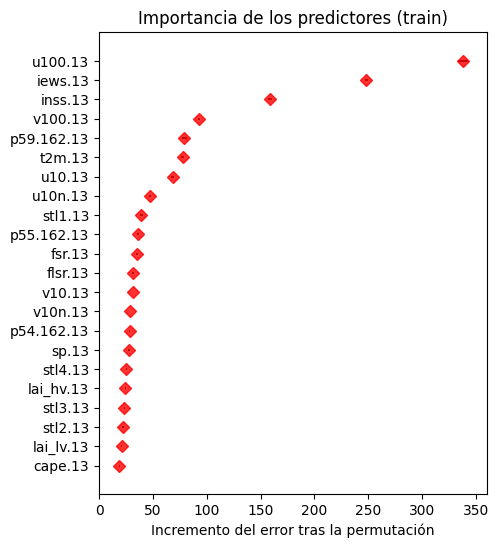

In [10]:


importancia = permutation_importance(
                estimator    = modelo_rf,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 100472037
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
# df_importancia['feature'] = X_train.columns
df_importancia['feature'] = x.columns
df_importancia.sort_values('importances_mean', ascending=False)
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

Como se puede observar, las variables que más influyen son u100.13, iews.13, inss.13 y v100.13. En comparación con los modelos de regresión, las variables que más influyen en la predicción son distintas. Vamos a comparar estos resultados con los de la importancia por pureza, que mide el incremento de la pureza de los nodos por las divisiones en las que participa cada predictor. También es una medida de la influencia de cada variable sobre el rendimiento final del modelo.

In [14]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x.columns,
                             'importancia': modelo_rf.feature_importances_}
                            )
print("Importancia por pureza de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
20,u100.13,0.256976
15,iews.13,0.240669
16,inss.13,0.079170
10,u10.13,0.063374
21,v100.13,0.045699
12,t2m.13,0.033371
3,p59.162.13,0.033085
6,u10n.13,0.029368
9,stl1.13,0.019915
11,v10.13,0.019764


Las variables con mayor importancia por pureza son las mismas que en el caso de importancia por permutación.

## XGBoost

In [15]:
# espacio de búsqueda
param_grid = {'max_depth'        : [None, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'n_estimators'     : sp_randint(50, 500)
              }

# Búsqueda por random search con validación cruzada
# ==============================================================================
inner = KFold(n_splits=3, shuffle=True, random_state=100472037)
budget = 100
grid = RandomizedSearchCV(
    estimator  = XGBRegressor(random_state = 100472037),
    param_distributions= param_grid,
    scoring    = 'neg_root_mean_squared_error',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = inner,
    refit      = True,
    verbose    = 0,
    n_iter=budget
)

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

# Esto sería una estimación del error usando Holdout
print(f"RMSE de XGB con búsqueda de hiperparámetros: {rmse(y_test, grid.predict(X=X_test))}")
grid.best_params_, -grid.best_score_

RMSE de XGB con búsqueda de hiperparámetros: 358.29904554309775


({'learning_rate': 0.05,
  'max_depth': 10,
  'n_estimators': 179,
  'subsample': 0.5},
 359.62179883417775)

## Clasificación

A continuación se propone convertir el problema de regresión a uno de clasificación. Para ello, se dividirá la energía en lata o baja de la siguiente forma: si la energía está por debajo del tercer cuartil será "baja", en caso contrario será alta. Por lo tanto, vamos a empezar calculando el tercer cuartil de los datos que tenemos.

In [5]:
# Calcula el tercer cuartil de la variable 'y'
tercer_cuartil = y.quantile(0.75)

print("Tercer cuartil de la variable 'y':", tercer_cuartil)

Tercer cuartil de la variable 'y': 1089.375


A continuación divideremos los datos que tenemos en función de su energía para después poder evaluar para que conjunto de datos funciona mejor el modelo.

In [6]:

# Filtrar las filas en x en función del tercer cuartil de y
x_bajo = x.loc[y < tercer_cuartil]
x_alto = x.loc[y >= tercer_cuartil]

# Filtrar las filas en y en función del tercer cuartil de y
y_bajo = y.loc[y < tercer_cuartil]
y_alto = y.loc[y >= tercer_cuartil]
print("Dimensión del conjunto de datos de baja energía", x_bajo.shape)
print("Dimensión del conjunto de datos de alta energía", x_alto.shape)



Dimensión del conjunto de datos de baja energía (3561, 22)
Dimensión del conjunto de datos de alta energía (1187, 22)


Una vez que hemos dividio los datos, vamos a utilizar el modelo creado para hacer predicciones en los dos conjuntos y determinar donde se produce un menor error. Como se puede ver hay muchos más datos de energía baja, por lo que esperamos que el modelo de menor error para este conjunto de datos.

In [7]:
pred_bajo = modelo_final.predict(x_bajo)
rmse_bajo = rmse(pred_bajo, y_bajo)

pred_alto = modelo_final.predict(x_alto)
rmse_alto = rmse(pred_alto, y_alto)

# Imprimir las métricas
print("Error valores bajos:", rmse_bajo)
print("Error valores altos:", rmse_alto)

NameError: name 'modelo_final' is not defined

Se puede observar que las predicciones para valores altos de energía son peores que para valores bajos. Como hemos dicho antes, esto se debe a que es un problema muy desbalamceado y hay muchos más datos para valores bajos de energía. A la hora de hacer modelos de clasificación habrá que tener esto en cuenta y usar métricas adecuadas.

Para convertir el problema de regresión a clasificación cambiaremos la variable de salida. Ahora será un valor booleano (0 o 1) que indique la pertenecia a la clase alta de energía (es decir, para voleres bajos de energía la salida será 0 y para valores altos la salida será 1).

In [8]:
# Convertir todos los datos en y_bajo a 0
y_bajo = y_bajo.apply(lambda x: 0)

# Convertir todos los datos en y_alto a 1
y_alto = y_alto.apply(lambda x: 1)

Para empezar a probar modelos juntaremos las dos clases. Al igual que en los anteriores apartados, para la evaluación outer utilizaremos holdout dejando un tercio de datos para el test y el resto para entrenar el modelo. Para el ajuste de hiperparámetros utilizaremos el mismo método que el los anteriores apartados. Como en este caso tenemos dos clases muy desbalanceadas, vamos a hacer un split estratificado al crear los conjuntos de test y de entrenamiento.

In [9]:
x_categorico = pd.concat([x_bajo, x_alto])
y_categorico = pd.concat([y_bajo, y_alto])

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(x_categorico, y_categorico, test_size=0.33, random_state=100472037, stratify=y_categorico)

### Regresión logística

El primer modelo que vamos a probar para la clasificación es el de regresión logísitca. Este es un tipo de modelo de clasificación binaria que se basa en interpretar la salida del modelo como una probabilidad de pertenencia a una clase. Para ellos se utiliza un modelo lineal cuya salida se pasa como argumento a una función logísitca para transformarla en una probabilidad.

Vamos a hacer un modelo de regresión logística primero sin ajustar hiperparámetros. Como los dos conjuntos estan bastantes desbalanceados, la métrica que utilizaremos para medir la precisión del modelo será balanced_accuracy. En esta caso, como no estamos haciendo búsqueda de hiperparámetros y no tardará mucho en entrenarse el modelo, utilizaremos un KFold de 5 divisiones. En los isguinetes apartados ya continuaremos con anteriormente.

In [63]:
# Probamos el modelo sin aplicar ninguna regularización y con los parámetros por efecto
# ==============================================================================
scaler = StandardScaler()
lr = LogisticRegression(penalty=None, random_state = 100472037, class_weight='balanced')
pipe_scale_lr = Pipeline([
    ('scale', scaler),
    ('lr', lr)])

# Entrenamiento del modelo
# ==============================================================================
cv = KFold(n_splits=5, shuffle=True, random_state = 100472037 )
scores = cross_val_score(pipe_scale_lr, X_train_c, y_train_c, scoring='balanced_accuracy', cv = cv) 
                                                                                  
print(f"All the accuracies are: {scores}")
print(f"And the average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")


All the accuracies are: [0.73018023 0.74990731 0.73593249 0.70884582 0.74540272]
And the average crossvalidation accuracy is: 0.73 +- 0.01


Se ha obtenido un accuracy de alrededor de 0.73, que es un buen valor teniendo en cuente que no ha habido ajuste de hiperparámetros. La desviación estándar de 0.01 indica también que los valores del accuracy no han cambiado mucho en las distintas iteraciones del Kfold, lo que podría indicar que es un modelo bastante estbla y generaliza bien para distintos conjuntos de test. 

Ahora procedemos al ajuste de hiperparámetros. Los hiperparámetros que se pueden ajustar con regresión logística son los siguientes:
- Regularización: al igual que en los otros modelos de regresión lineal, en regresión logística se pueden utilizar regularizaciones para evitar el sobreajuste. Estas regularizaciones serán lasso (l1), ridge (l2) o elasticnet.
- Parámetro C: controla la regularización de forma que valores más pequeños de C indican una regularización más fuerte y valores más grande indican una regularización más débil, dejando que le modelo se sobreajuste más.
- Solver: indica el algoritmo que se utiliza en el problema de optimización al ajustar el modelo. No todas las regularizaciones se pueden usar con todos estos algoritmos. 

In [64]:
param_grid = [{'lr__penalty': ['l1', 'l2', 'elascticnet'],
               'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]


inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

budget = 40
# Cross-validation (3-fold) para la búsqueda de hiper-parámetros
clf = GridSearchCV (estimator  = pipe_scale_lr,
                    param_grid = param_grid,
                    scoring='balanced_accuracy', 
                    cv=inner,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True)

np.random.seed(100472037)
t1 = time.time()
clf.fit(X=X_train_c, y=y_train_c)
t2 = time.time()

# Información del modelo
# ==============================================================================
modelo_final = clf.best_estimator_
print("Intercept:", modelo_final['lr'].intercept_)
print("Accuracy de test:", modelo_final.score(X_test_c, y_test_c))
print("Mejores parámetros: ", clf.best_params_)
t_lr_hp = t2- t1
print("Tiempo de entrenamiento: ", t_lr_hp)


Fitting 3 folds for each of 105 candidates, totalling 315 fits


Intercept: [-0.34738508]
Accuracy de test: 0.7358008934269304
Mejores parámetros:  {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
Tiempo de entrenamiento:  12.628551006317139


Tras el ajuste de hiperparámetros se obtiene que la mejor regularización para este modelo es la regularización ridge y el valor de C es 10, que no está en los extremos del espacio de búsqueda. En cuanto al accuracy, ha aumentado ligeramente en comparación con el modelo sin hiperparámetros ajustados. El intercepto en regresión logísitca es el valor que tomaría la variable de salida si todos los valores de los predicotres fuera 0. En este caso, el valor del intercepto es alrededor de -0.34. Que sea negativo indica que, si todas las variables fueran 0, la probabilidad de que la salida fuera 1 (energía alta) es menos que 0.5.

Vamos a avaluar los coeficientes de cada variable con el siguiente gráfico

Coeficientes: [('p54.162.13', 0.37057963144501943), ('p55.162.13', 0.10567529203238905), ('cape.13', -0.26322841966296756), ('p59.162.13', 0.9736236232518386), ('lai_lv.13', 0.4828840590390752), ('lai_hv.13', -0.4573981363673797), ('u10n.13', -3.298832509883416), ('v10n.13', 1.4623285184948813), ('sp.13', -0.4265040706782827), ('stl1.13', 0.054406730930034064), ('u10.13', 4.612384094386718), ('v10.13', -1.9769570844024669), ('t2m.13', -0.28495279370046456), ('stl2.13', -0.7458357324086349), ('stl3.13', 0.15883028413452843), ('iews.13', 0.9354774794838446), ('inss.13', -0.1676908394701424), ('stl4.13', 0.05621783871787717), ('fsr.13', 1.3686792182946514), ('flsr.13', -1.2816522043869412), ('u100.13', -2.5161761624312993), ('v100.13', 0.9114277592520924)]


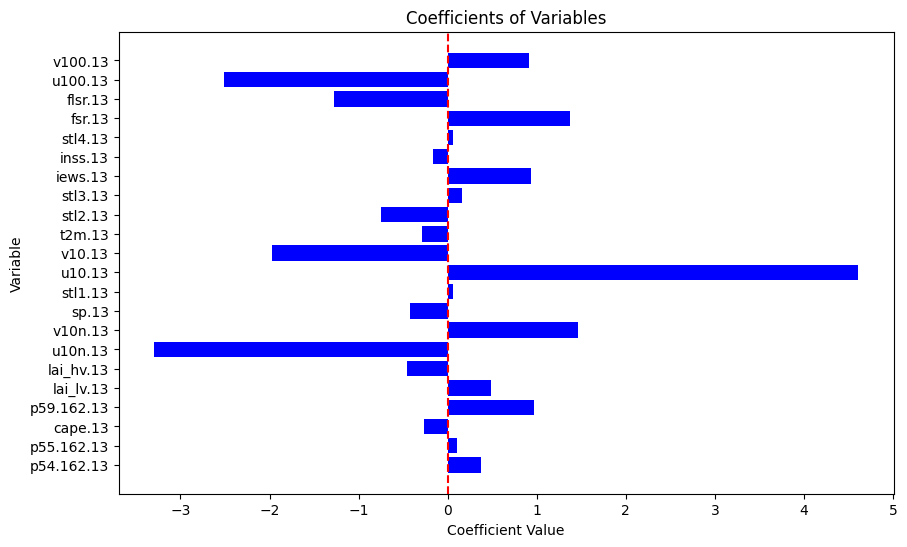

In [65]:
print("Coeficientes:", list(zip(x_categorico.columns, modelo_final['lr'].coef_.flatten(), )))

variable_names = x_categorico.columns
coefficients = modelo_final['lr'].coef_.flatten()

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(variable_names, coefficients, color='blue')

ax.axvline(x=0, color='red', linestyle='--')

# Set labels and title
ax.set_xlabel('Coefficient Value')
ax.set_ylabel('Variable')
ax.set_title('Coefficients of Variables')

plt.show()

Aunque tengan valores distintos a los coeficiente de los modelos de regresión lineal, se puede obeservar que las variables que más peso tienen siguen siendo las mismas. Los coeficientes positivos, como el de la variable u10.13, indican que un aumento en el valor de la variable supone un aumento de la probabilidad de pertenecer a la clase 1, de energía alta. Las variables con valores negativos indican lo contrario, un aumento en estas variables supone un aumento de la probabilidad de pertenecer a la clase ede energías bajas. Tanto si es negativo como positivo, cuanto mayot sea el valor del coeficiente de una variable más influencia tiene sobre la salida del modelo.

A continuación vamos a obtener la matriz de confusión del problema y datos a cerca de la precisión, recall y f1-score

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1175
           1       0.48      0.69      0.57       392

    accuracy                           0.74      1567
   macro avg       0.68      0.72      0.69      1567
weighted avg       0.78      0.74      0.75      1567



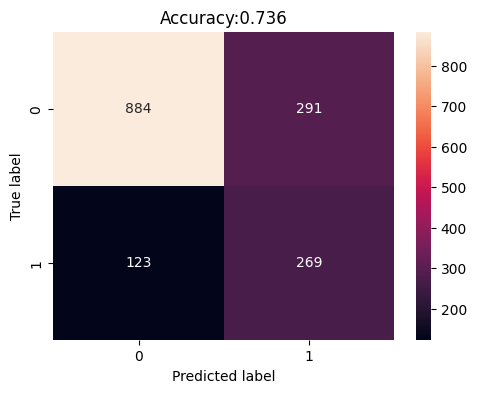

In [66]:
y_test_pred_c = modelo_final.predict(X_test_c)
result = metrics.classification_report(y_test_c, y_test_pred_c)
print("Classification Report:",)
print (result)

# Creates a confusion matrix
cm = metrics.confusion_matrix(y_test_c, y_test_pred_c)
accuracy = metrics.accuracy_score(y_test_c, y_test_pred_c)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['0','1'],
                     columns = ['0','1'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt = 'd')
plt.title('Accuracy:{0:.3f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Lo primero que se puede observar es que tanto para la precisión, el recall y el f1-score se han obtenido mejores resultados para la clase de energía baja que para la clase de energía alta. Esto tiene sentido porque hay muchos más datos en el conjunto de energía baja. Vamos a analizar los resultados más detalladamente:
- Precisión: indica la proporción de ejemplos clasificados de una clase que de verdad pertenecen a esa clase. En cuanto a la clase 0, de energías bajas, el 88% de instancias clasificadas en esta clase pertenecen realmente a esta clase. Para la clase 1, solo el 49% de las instancias clsificadas en esta clase pertenecen de verdad e ella.
- Recall: indica la proporción de instancias de una clase que han sido bien clasificadas. En cuanto a la clase 0, el 75% de las instancias de esta clase fueron bien clasificadas. Solo el 69% de las instancias que pertenecen a la clase 1 fueron clasificadas correctamente.
- f1-score: es la media armónica entre la precisión y el recall y se puede observar que también es más alto para los valores de la clase 0.

A continuación vamos a generar el gráfico donde se muestra la curva ROC. La curva ROC es una herramienta que se utiliza para evaluer el rendiemiento de un modelo de clasificación y se muestra la tasa de verdaderos positivos en función de la tasa de falsos positivos.

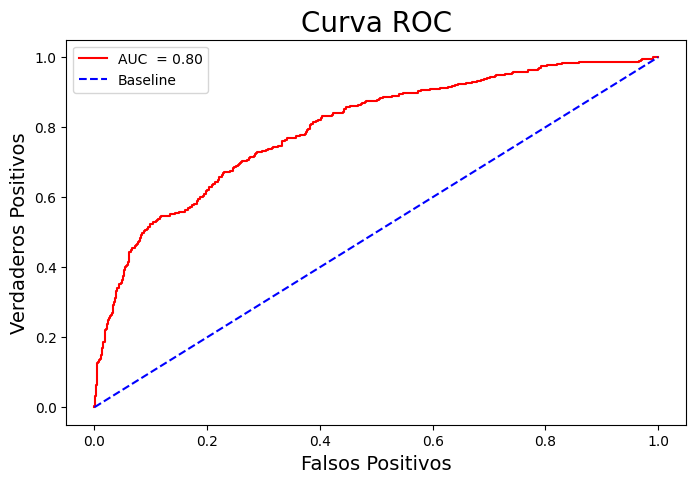

In [67]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = modelo_final.predict_proba(X_test_c)[:, 1]

auc = metrics.roc_auc_score(y_test_c, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_c, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}', color='red')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

Obviamente la curva ROC esá por encima del baseline, que representa un modelo que clasifica las instancias aleatoriamente. El área bajo la curva del modelo es 0.8 que es un valor bastante bueno.

### SVM

Además de regresión logística queremos porbar otros modelos de clasificación. Como para el problema de regresión el modelo que daba un mejor resultado era el SVM, queremos probarlo para el problema de clasificación.

Primero haremos un modelo con un kernel lineal y sin ajustar hiperparámetros

In [14]:
scaler = StandardScaler()

modelo_svc_lineal = SVC(C = 100, kernel = 'linear', random_state=100472037, class_weight='balanced')
pipe_scale_svc = Pipeline([
    ('scale', scaler),
    ('SVC', modelo_svc_lineal)])
t1 = time.time()
pipe_scale_svc.fit(X_train_c, y_train_c)
t2 = time.time()

accuracy = balanced_accuracy_score(
            y_true    = y_test_c,
            y_pred    = pipe_scale_svc.predict(X_test_c),
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 71.84248805905341%


El accuracy es de alrededor del 72%, que es menor que el que se conseguía con el modelo de regresión logística. Vamos a continuar ajustando hiperparámetros para ver si mejora el resultado.

Los hiperparámetros que vamos a justar son los siguientes:
- C: controla la regularización del modelo. Un valor más pequeño de C indica regularización más fuerte mientras que un valor más grande indica una regularización más débil y el modelo se sobreajusta más a los datos de entrenamiento.

In [48]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'SVC__C': [0.001, 0.01, 0.1, 1, 10]}
modelo_svc_lineal_hp = SVC(kernel= "linear", class_weight='balanced')
pipe_svc_lineal_hp =  Pipeline([
    ('scale', scaler),
    ('SVC', modelo_svc_lineal_hp)])


# Búsqueda por validación cruzada
# =============================================================================
inner = KFold(n_splits=3, shuffle=True, random_state=100472037)
grid_l = GridSearchCV(
        estimator  = pipe_svc_lineal_hp,
        param_grid = param_grid,
        scoring    = 'balanced_accuracy',
        n_jobs     = -1,
        cv         = inner,
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
t1 = time.time()
grid_l.fit(X = X_train_c, y = y_train_c)
t2 = time.time()

accuracy = balanced_accuracy_score(
            y_true    = y_test_c,
            y_pred    = grid_l.predict(X_test_c),
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")
t_svc_lineal_hp = t2 -t1
print("Tiempo de entrenamiento ", t_svc_lineal_hp)
print("Mejores parámetros: ", grid_l.best_params_)


El accuracy de test es: 72.39622231871472%
Tiempo de entrenamiento  10.575431108474731
Mejores parámetros:  {'SVC__C': 1}


Se puede ver que los resultados han mejorado ligeramente con respecto al modelo sin ajuste de hiperparámetros. El mejor valor para C es de 0.01, que no se encuentra en las fronteras del espacio de búsqueda.

Vamos a probar también un modelo SVM con un kernel gaussiano. En este caso, además del hiperparámetro C ajustaremos también gamma. EL valor de gamma define la curvatura en la frontera de decisión. Valores extremos de gamma, tanto altos como bajos dan como resultado un modelo menos preciso. Son los valores intermedios los que proporcionan mayor precisión.

In [45]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'SVC__C': [0.1, 1, 10, 100],
              'SVC__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
modelo_svc_hp = SVC(kernel= "rbf", class_weight='balanced')
pipe_svc_hp =  Pipeline([
    ('scale', scaler),
    ('SVC', modelo_svc_hp)])


# Búsqueda por validación cruzada
# ==============================================================================
inner = KFold(n_splits=3, shuffle=True, random_state=100472037)
grid = GridSearchCV(
        estimator  = pipe_svc_hp,
        param_grid = param_grid,
        scoring    = 'balanced_accuracy',
        n_jobs     = -1,
        cv         = inner,
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
t1 = time.time()
grid.fit(X = X_train_c, y = y_train_c)
t2 = time.time()
y_pred = grid.predict(X_test_c)
accuracy = balanced_accuracy_score(
            y_true    = y_test_c,
            y_pred    = y_pred,
           )
modelo_final_svc = grid.best_estimator_
print("")
print(f"El accuracy de test es: {100*accuracy}%")
t_svc_hp = t2 -t1
print("Tiempo de entrenamiento ", t_svc_hp)
print("Mejores parámetros: ", grid.best_params_)


El accuracy de test es: 85.19767694311767%
Tiempo de entrenamiento  36.105260610580444
Mejores parámetros:  {'SVC__C': 10, 'SVC__gamma': 0.01}


Se puede observar que este modelo da un resultado muchos mejor que el modelo con kernel lineal y que el modelo de regresión logística ya que el accuracy es del 85%. Los mejores valores para C y gamma con 10 y 0.02 respectivamente, que no se encuentran en las fronteras del espacio de búsqueda. Para analizar mejor estos reultados vamos a crear la matriz de confusión.

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1175
           1       0.65      0.85      0.74       392

    accuracy                           0.85      1567
   macro avg       0.80      0.85      0.82      1567
weighted avg       0.87      0.85      0.86      1567



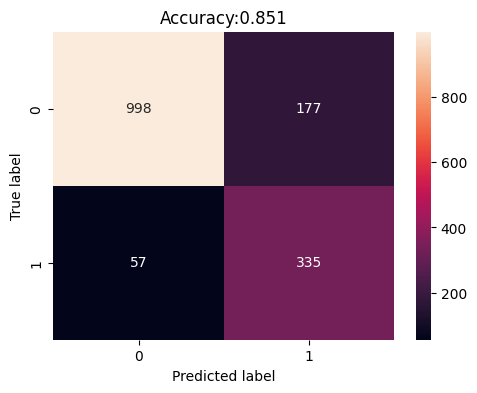

In [60]:
y_test = modelo_final_svc.predict(X_test_c)
result = metrics.classification_report(y_test_c, y_test)
print("Classification Report:",)
print (result)

# Creates a confusion matrix
cm = metrics.confusion_matrix(y_test_c, y_test)
accuracy = metrics.accuracy_score(y_test_c, y_test)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['0','1'],
                     columns = ['0','1'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt = 'd')
plt.title('Accuracy:{0:.3f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

A primera vista se ve que los valores son mejores que los obtenidos con el modelo de regresión logística, pero vamos a anlizarlos más en detalle.
- Precisión: en caso podemos ver que el valor de la clase 0 es muy alto, del 95%, lo que indica que el 95% de instancias clasificadas en esta clase pertenecen realmente a ella. Para la clase 1 el valor es más bajo, del 65%, pero sigue siendo más alto que el obtenido con la regresión logística.
- Recall: en este caso el valor de las dos clases es exactamente el mismo, 85%, lo que indica que el 85% de las instancias de ambas clases fueron bien clasificadas.
- f1-score: en este caso sigue siendo más alto para los valores de la clase 0.

Los resultados obtenidos siguen siendo un poco mejor para los datos de la clase 0, pero no hay tsnts diferencia entre ambas clases como lo había en el modelo de regresión logística.

### Árbol de clasificación

El último modelo que vamos a probar para la clasificación es un árbol. primero crearemos el modelo sin ajustar hiperparámetros.

In [52]:
clf = tree.DecisionTreeClassifier(class_weight='balanced')
# Ahora, entrenamos (*fit*) el método en el conjunto de datos (X,y)
t1 = time.time()
clf.fit(X_train_c, y_train_c)
t2 = time.time()
y_test_pred = clf.predict(X_test_c)
accuracy_tree = metrics.balanced_accuracy_score(y_test_c, y_test_pred)

print("")
print(f"El accuracy de test es: {100*accuracy_tree}%")
t_tree = t2 -t1
print("Tiempo de entrenamiento ", t_tree)


El accuracy de test es: 77.46102909248806%
Tiempo de entrenamiento  0.08411169052124023


Se puede observar que se obtiene un resultado bastante bueno, mejor que el obtenido con el modelo de regresión logística. Ahora vamos a ajustar los hiperparámetros del árbol. Los hiperparámetros que vamos a ajustar son la profundidad máxima del árbol y el número mínimo de instancias necesarias para dividir un nodo.

In [58]:
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(1,16,2))}

inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

tree_hp = GridSearchCV(clf,
                   param_grid,
                   scoring='balanced_accuracy',
                   cv=inner,
                   n_jobs=1, verbose=1)

np.random.seed(100472037)
t1 = time.time()
tree_hp.fit(X=X_train_c, y=y_train_c)
t2 = time.time()

y_test_pred = tree_hp.predict(X_test_c)
accuracy_tree = metrics.balanced_accuracy_score(y_test_c, y_test_pred)

print("")
print(f"El accuracy de test es: {100*accuracy_tree}%")
t_tree_hp = t2 -t1
print("Tiempo de entrenamiento ", t_tree_hp)
print("Mejores hiperparámetros ", tree_hp.best_params_)
modelo_final_tree = tree_hp.best_estimator_

Fitting 3 folds for each of 56 candidates, totalling 168 fits



El accuracy de test es: 81.243052540165%
Tiempo de entrenamiento  6.715392827987671
Mejores hiperparámetros  {'max_depth': 4, 'min_samples_split': 5}


El resultado obtenido es del 81%, que es un resultado bastante bueno, por encima del de regresión lgística, pero no tan bueneo como el del SVM radial. Las profundidad máxima del árbol es de 4 y el número mínimo de instancias en cada nodo es de 5. Para analizar mejor los resultados vamos a crear la matriz de confusión.

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1175
           1       0.62      0.79      0.69       392

    accuracy                           0.82      1567
   macro avg       0.77      0.81      0.78      1567
weighted avg       0.85      0.82      0.83      1567



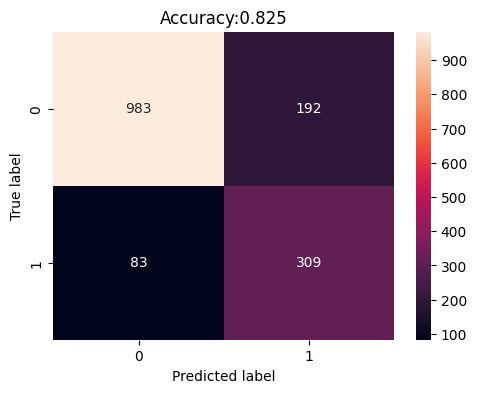

In [61]:
y_test_pred = modelo_final_tree.predict(X_test_c)
result = metrics.classification_report(y_test_c, y_test_pred)
print("Classification Report:",)
print (result)

# Creates a confusion matrix
cm = metrics.confusion_matrix(y_test_c, y_test_pred)
accuracy = metrics.accuracy_score(y_test_c, y_test_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['0','1'],
                     columns = ['0','1'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt = 'd')
plt.title('Accuracy:{0:.3f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Los resultados que se obtienen son un punto intermedio entre el modelo de regresión logística y el SVM radial. Se puede ver que en general se obtienen buenos resultados, pero se siguen obteniedno mejores para los datos de la clase 0 que los de la clase 1 debido a que la clase 0 es la clase mayoritaria

### Random Forest

In [11]:
# Creación del modelo
# ==============================================================================
rf = RandomForestClassifier(
            n_estimators = 10,
            max_depth    = None,
            max_features = 1.0,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 100472037,
            class_weight='balanced'
         )

# Entrenamiento del modelo
# ==============================================================================
t1 = time.time()
rf.fit(X_train_c, y_train_c)
t2 = time.time()
t_rf = t2 - t1

y_test_pred = rf.predict(X_test_c)
accuracy_rf = metrics.balanced_accuracy_score(y_test_c, y_test_pred)

print("")
print(f"El accuracy de test es: {100*accuracy_rf}%")
t_rf = t2 -t1
print("Tiempo de entrenamiento ", t_rf)



El accuracy de test es: 78.56904038211029%
Tiempo de entrenamiento  0.42255353927612305


Da mas alto que todos sin ajustar hiperparámetros

In [14]:
param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,x.shape[1])}

inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

budget = 20
# Cross-validation (3-fold) para la búsqueda de hiper-parámetros
rf_hp = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced'),
                         param_grid,
                         scoring='balanced_accuracy',
                         cv=inner,
                         refit=True,
                         n_jobs=-1, verbose=1,
                         n_iter=budget
                        )

np.random.seed(100472037)
t1 = time.time()
rf_hp.fit(X=X_train_c, y=y_train_c)
t2 = time.time()
t_rf_hp = t2 - t1

y_test_pred = rf_hp.predict(X_test_c)
accuracy_rf_hp = metrics.balanced_accuracy_score(y_test_c, y_test_pred)

print("")
print(f"El accuracy de test es: {100*accuracy_rf_hp}%")
t_rf_hp = t2 -t1
print("Tiempo de entrenamiento ", t_rf_hp)
print("Mejores hiperparámetros ", rf_hp.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits



El accuracy de test es: 80.73729917498915%
Tiempo de entrenamiento  63.83076310157776
Mejores hiperparámetros  {'max_features': 16, 'n_estimators': 185}


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1175
           1       0.79      0.67      0.73       392

    accuracy                           0.87      1567
   macro avg       0.84      0.81      0.82      1567
weighted avg       0.87      0.87      0.87      1567



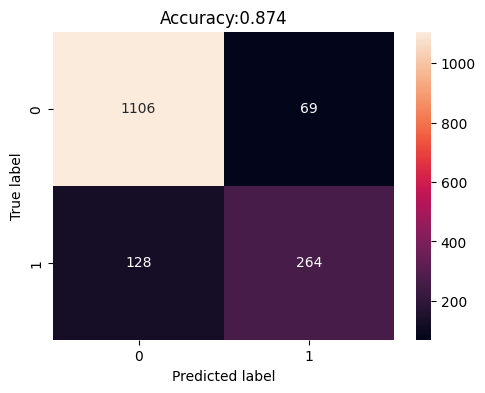

In [15]:
modelo_final_tree = rf_hp.best_estimator_
y_test_pred = modelo_final_tree.predict(X_test_c)
result = metrics.classification_report(y_test_c, y_test_pred)
print("Classification Report:",)
print (result)

# Creates a confusion matrix
cm = metrics.confusion_matrix(y_test_c, y_test_pred)
accuracy = metrics.accuracy_score(y_test_c, y_test_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['0','1'],
                     columns = ['0','1'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt = 'd')
plt.title('Accuracy:{0:.3f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Hist gradient boosting

In [20]:
# Creación del modelo
# ==============================================================================
regr_gb = HistGradientBoostingClassifier(
            random_state = 100472037, 
            class_weight="balanced"
         )

# Entrenamiento del modelo
# ==============================================================================
np.random.seed(100472037)

t1 = time.time()
regr_gb.fit(X_train_c, y_train_c)
t2 = time.time()
t_gb = t2 - t1

y_test_pred = rf_hp.predict(X_test_c)
accuracy_gb = metrics.balanced_accuracy_score(y_test_c, y_test_pred)

print("")
print(f"El accuracy de test es: {100*accuracy_gb}%")
print("Tiempo de entrenamiento ", t_gb)



El accuracy de test es: 80.73729917498915%
Tiempo de entrenamiento  0.9627218246459961


In [31]:
param_grid = {'max_depth'         : [None, 1, 3, 5, 10, 20, 30],
              'learning_rate'     : [0.001, 0.01, 0.1, 0.2, 0.3, 0.4],
              'l2_regularization' : [0, 1],
              'max_leaf_nodes': [2, 10, 30, 40],
                'min_samples_leaf': [1, 5, 10, 20, 30]
             }

inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

budget = 100
# Cross-validation (3-fold) para la búsqueda de hiper-parámetros
gb_hp = RandomizedSearchCV (estimator  = HistGradientBoostingClassifier(max_iter            = 1000,
                                                                      random_state        = 100472037,
                                                                      # Activación de la parada temprana
                                                                      validation_fraction = 0.1,
                                                                      n_iter_no_change    = 5,
                                                                      tol                 = 0.0001,
                                                                      class_weight = "balanced"),
                           param_distributions = param_grid,
                           scoring='balanced_accuracy',
                           cv=inner,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           n_iter=budget,
                           return_train_score=True,
                           )

np.random.seed(100472037)

t1 = time.time()
gb_hp.fit(X=X_train_c, y=y_train_c)
t2 = time.time()

y_test_pred = gb_hp.predict(X_test_c)
accuracy_gb_hp = metrics.balanced_accuracy_score(y_test_c, y_test_pred)

print("")
print(f"El accuracy de test es: {100*accuracy_gb_hp}%")
t_gb_hp = t2 -t1
print("Tiempo de entrenamiento ", t_gb_hp)
print("Mejores hiperparámetros ", gb_hp.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits



El accuracy de test es: 85.11289622231872%
Tiempo de entrenamiento  193.64932942390442
Mejores hiperparámetros  {'min_samples_leaf': 5, 'max_leaf_nodes': 2, 'max_depth': 5, 'learning_rate': 0.1, 'l2_regularization': 0}


In [ ]:
modelo_final_gb = gb_hp.best_estimator_
y_test_pred = modelo_final_gb.predict(X_test_c)
result = metrics.classification_report(y_test_c, y_test_pred)
print("Classification Report:",)
print (result)

# Creates a confusion matrix
cm = metrics.confusion_matrix(y_test_c, y_test_pred)
accuracy = metrics.accuracy_score(y_test_c, y_test_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['0','1'],
                     columns = ['0','1'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt = 'd')
plt.title('Accuracy:{0:.3f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### XGBoost

In [40]:
# espacio de búsqueda
param_grid = {'max_depth'        : [None, 1,2, 3,4, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'n_estimators'     : sp_randint(50, 500)
              }

# Búsqueda por random search con validación cruzada
# ==============================================================================
inner = KFold(n_splits=3, shuffle=True, random_state=100472037)
budget = 100
grid = RandomizedSearchCV(
    estimator  = XGBClassifier(random_state = 100472037, scale_pos_weight = (sum(y_train_c ==0)/sum(y_train_c ==1))),
    param_distributions= param_grid,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = inner,
    refit      = True,
    verbose    = 0,
    n_iter=budget
)

t1 = time.time()
grid.fit(X = X_train_c, y = y_train_c)
t2 = time.time()

y_test_pred = grid.predict(X_test_c)
accuracy_xb = metrics.balanced_accuracy_score(y_test_c, y_test_pred)

print("")
print(f"El accuracy de test es: {100*accuracy_xb}%")
t_xb = t2 -t1
print("Tiempo de entrenamiento ", t_xb)
print("Mejores hiperparámetros ", grid.best_params_)
print(XGBClassifier().get_params())


El accuracy de test es: 84.04982631350413%
Tiempo de entrenamiento  33.87247180938721
Mejores hiperparámetros  {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 212, 'subsample': 0.5}
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None

### Chat GPT